<a href="https://colab.research.google.com/github/mohd-faizy/07P_Exploratory_Data_Analysis_With_Seaborn/blob/master/04_Tumor_Diagnosis_RandomForest_Part_4_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Tumor Diagnosis: Part4B Using Random Forest Classifier(RFC)__

In [1]:
from google.colab import files
upload_file = files.upload()

Saving breast_cancer_data_A.csv to breast_cancer_data_A.csv


In [2]:
# Importing the Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import sklearn

from IPython.display import display
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the Dataset and Listing the Features/Attributes given in the dataset.
complete_data = pd.read_csv('/content/breast_cancer_data_A.csv')
complete_data = complete_data.drop('Unnamed: 32', axis=1) #drop Unnamed Column from dataset

display(complete_data.head()) #Show the first 5 rows of the dataset

# Print number of data points
print("Number of Data Points: {}".format(complete_data.shape[0]))
# Print number of features
print("Number of Features/Attributes: {}".format(complete_data.shape[1]))
# Print the list of all features in the dataset 
print("Features/Attributes:", complete_data.columns) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Data Points: 569
Number of Features/Attributes: 32
Features/Attributes: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
"""
Print description of the dataset. Includes Count, Mean, Standard Deviation,
Minimum Value, 25th Percentile, 50th Percentile or Median, 
75th Percentile and Maximum Value for each of the Features in the Dataset
"""
complete_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Separate ID Data and Labels from Dataset
id_data = complete_data['id'] #ID Column from complete_data
labels = complete_data['diagnosis'] #Lables column from complete_data

class_distribution = labels.value_counts() #distribution between malignant and benign tumors 
print (class_distribution)

B    357
M    212
Name: diagnosis, dtype: int64


In [6]:
"""
Form data by dropping unneccesary ID column from complete_data and dropping
diagnosis column from complete_data as it serves as labels.Map labels/targets
from letters to number
"""

data = complete_data.drop('id', axis=1) #drop the ID Column from complete_data
data = data.drop('diagnosis', axis=1) #drop the diagnosis column from complete_data
labels = labels.map({'B': 0, 'M': 1}) #Map the lables/targets vector, with 0 representing benign tumors and 1 represeting malignant tumors

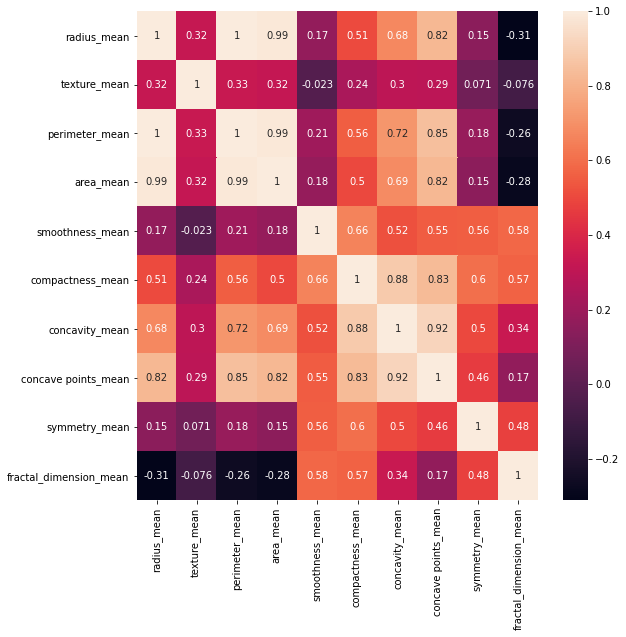

In [7]:
"""
Plot Correlation Heatmap for data to observe the nature and extent correlation
between various features in the dataset 
"""

plt.figure(figsize=(9,9)) 
sns.heatmap(data.iloc[:,:10].corr(),cbar=True,yticklabels=True,annot=True)

In [8]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Scale the data and split it into training and testing sets

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler() #Create MinMaxScaler object from SKLearn
scaled_data = scaler.fit_transform(data) #Fit our data to the object to scale the data.

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.15) #Split data with 15% of data in the test set 

In [10]:
# Finding contribution of individual features towards whether or not a certain cancer tumor is malignant or benign. 

#Map values in diagnosis column, 0 representing benign  and 1 represeting malignant 
complete_data['diagnosis'] = complete_data['diagnosis'].map({'B': 0, 'M': 1}) 
data_for_corr = complete_data[['radius_mean', 'perimeter_mean', 'area_mean',
                               'compactness_mean', 'concavity_mean',
                               'concave points_mean', 'diagnosis']]
#Create data_for_corr with various features and diagnosis 
data_for_corr.head() 

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,diagnosis
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,1
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,1
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,1
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,1


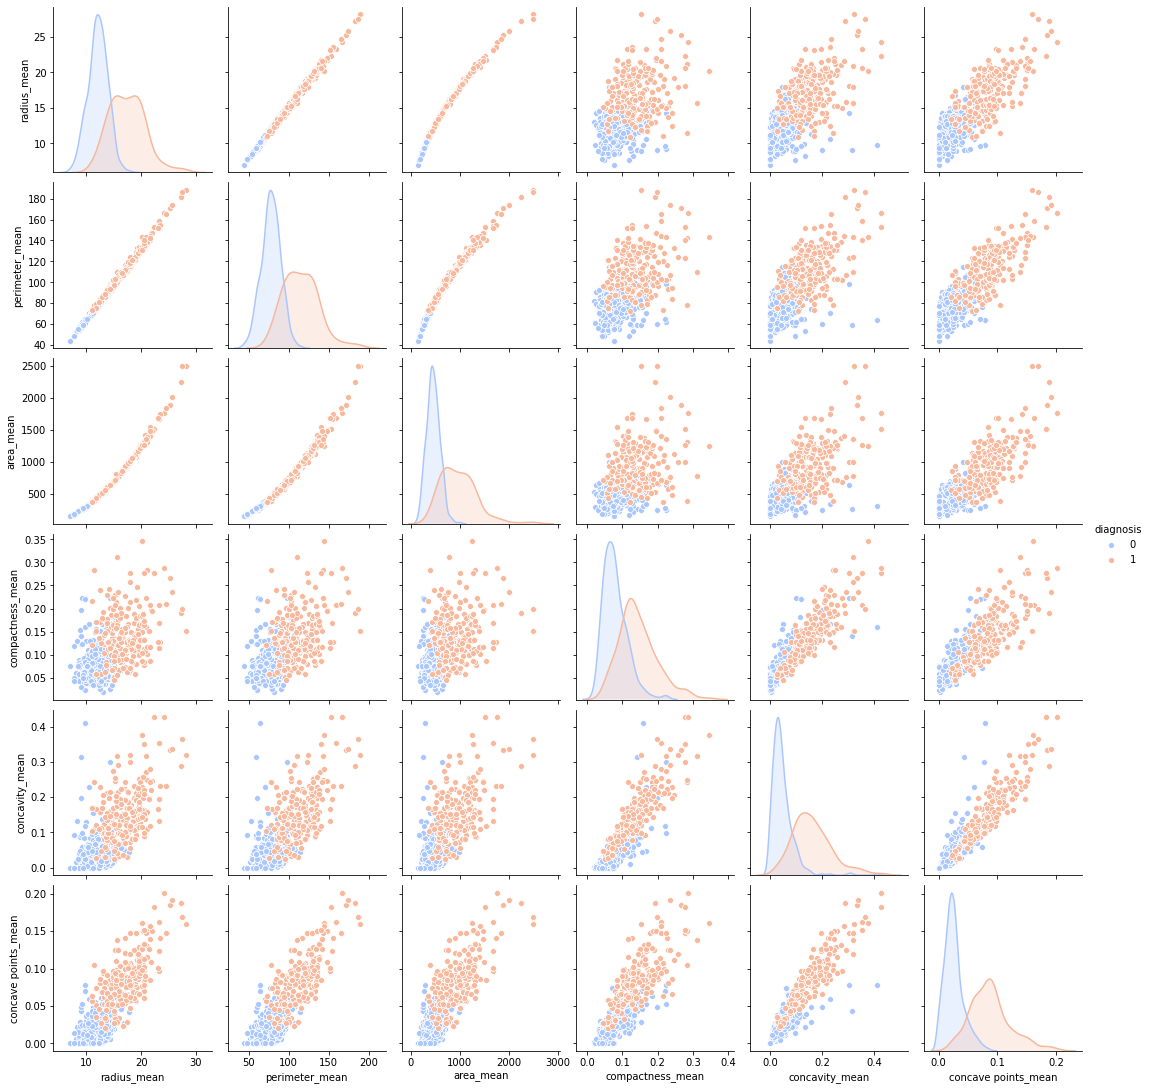

In [11]:
# Create Pairplot from Seaborn to see relationship between individual features and diagnosis
sns.pairplot(data_for_corr,palette='coolwarm',hue= 'diagnosis')

In [12]:
# Build Random Forest Classifier which we will use to find feature importances for the various features in the dataset.
from sklearn.ensemble import RandomForestClassifier #import the classfier from SKLearn
rfc = RandomForestClassifier()   # Build the classfier
rfc.fit(X_train, y_train)        # Fit the model with our data
names = data.columns

# Print the results
print("Features sorted by their score:")

# Print the features in descending order of feature importance
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True)) 

Features sorted by their score:
[(0.1394, 'area_worst'), (0.1183, 'concave points_worst'), (0.1178, 'concave points_mean'), (0.0997, 'radius_worst'), (0.0692, 'concavity_mean'), (0.0609, 'perimeter_worst'), (0.0583, 'area_mean'), (0.0521, 'perimeter_mean'), (0.0514, 'radius_mean'), (0.0388, 'area_se'), (0.0291, 'compactness_worst'), (0.023, 'concavity_worst'), (0.0192, 'perimeter_se'), (0.0165, 'texture_worst'), (0.0136, 'texture_mean'), (0.0135, 'smoothness_worst'), (0.0109, 'radius_se'), (0.0104, 'compactness_mean'), (0.0084, 'symmetry_worst'), (0.0073, 'fractal_dimension_worst'), (0.0061, 'symmetry_se'), (0.0056, 'concavity_se'), (0.0049, 'smoothness_mean'), (0.0047, 'texture_se'), (0.0042, 'concave points_se'), (0.0037, 'symmetry_mean'), (0.0035, 'fractal_dimension_mean'), (0.0034, 'compactness_se'), (0.0031, 'fractal_dimension_se'), (0.0027, 'smoothness_se')]


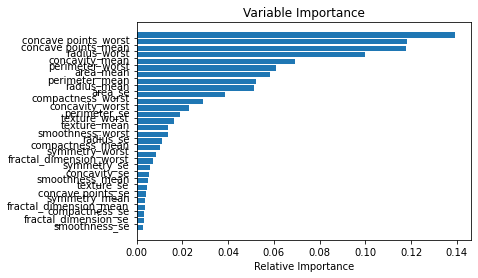

In [13]:
# Create plot showing variable feature importances of all features

importance = rfc.feature_importances_        #isolate feature importances
sorted_importances = np.argsort(importance)  #sort the feature importances
padding = np.arange(len(names)-1) + 0.5      #insert padding
plt.barh(range(len(sorted_importances)), importance[sorted_importances], align='center') #plot the data

#customize and show the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

<function matplotlib.pyplot.show>

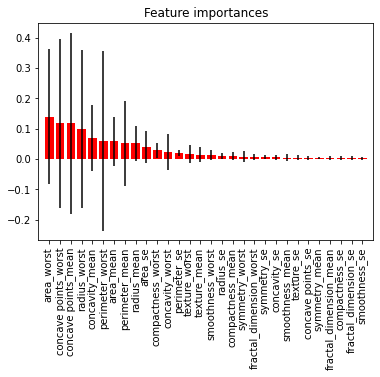

In [14]:
"""
Another and more complicated  way  of  plotting  feature importances  using
box  plots  and  feature  importances  of  features  obtained  from  various 
different Random Forest models each with varying hyperparameters
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label=0)

parameters = [{'n_estimators': np.arange(10,150,10),
               'max_features': np.arange(5,30,5),
               'min_samples_split': np.arange(2, 8, 2)}]

rfc_grid = GridSearchCV(rfc, parameters, scoring = f1_scorer)

rfc_grid = rfc_grid.fit(X_train, y_train)
rfc_tuned = rfc_grid.best_estimator_
rfc_tuned.fit(X_train, y_train)

std = np.std([tree.feature_importances_ for tree in rfc_tuned.estimators_], axis=0)
indices = np.argsort(importance)[::-1]
label_features_sorted=[]
header = list(data.columns.values)
for i in indices:
    label_features_sorted.append(header[i])
    
plt.title("Feature importances")
plt.bar(range(data.shape[1]), importance[indices], color = "r", yerr = std[indices], align="center")
plt.xticks(range(data.shape[1]), label_features_sorted, rotation=90)
plt.xlim([-1, data.shape[1]])
plt.show

Shape of Reduced Data:  (569, 2)
Reduced Data:
[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


<function matplotlib.pyplot.show>

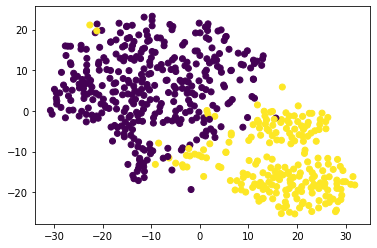

In [15]:
"""
Perform PCA in order reduce the dimensionality  of  the  data  to  print  out
the dimensionally reduced data (2D Data) and use TSNE to visualize  the  same
"""
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                      #build the model
reduced_data = pca.fit_transform(data)         #reduce the data, output is ndarray
print("Shape of Reduced Data: ", reduced_data.shape) #inspect shape of the `reduced_data`
print("Reduced Data:")
print(reduced_data)                            #print out the reduced data

#Plot the data reduced to 2 dimensions using TSNE with PCA
tsne = TSNE(init='pca')
tsne_plot = tsne.fit_transform(scaled_data)
plt.scatter(tsne_plot[:, 0], tsne_plot[:,1], c=labels)
plt.show



---

